# Transformada de Fourier de Tempo Discreto - DTFT

A DTFT difere da transformada de Fourier ao aplicar-se a funções cuja variável independente é discreta (descontínua), e não contínua, como é o caso da transformada de Fourier. A DTFT não deve ser confundida com a transformada discreta de Fourier (DFT), que pode ser considerada como um seu caso especial, que aparece numa situação muito comum: quando a função original é periódica.

## Definição

Dado um conjunto discreto de números reais ou complexos: ${\displaystyle x[n],\;n\in \mathbb {Z} }$ (inteiros), a transformada de Fourier de tempo discreto de ${\displaystyle x[n]\,}$ é usualmente escrita:

${\displaystyle X(\omega )=\sum _{n=-\infty }^{\infty }x[n]\,e^{-i\omega n}}$  

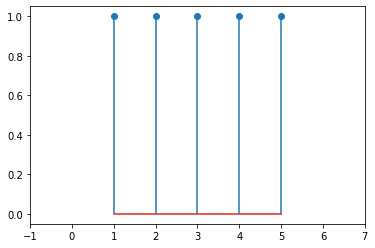

In [6]:
# Exemplo 01 - Sinal Contínuo Discreto:

import numpy as np
import matplotlib.pyplot as plt

# Criando um array no eixo n de inteiros:
n = np.array([1, 2, 3, 4, 5])

# Criando um array no eixo y - sinal contínuo:
y = np.array([1, 1, 1, 1, 1])

# Plotando o sinal o sinal 
plt.stem(n, y)

# Mudando a dimensão do eixo x:
plt.xlim((-1, 7))

# Visualizando as imagens
plt.show()